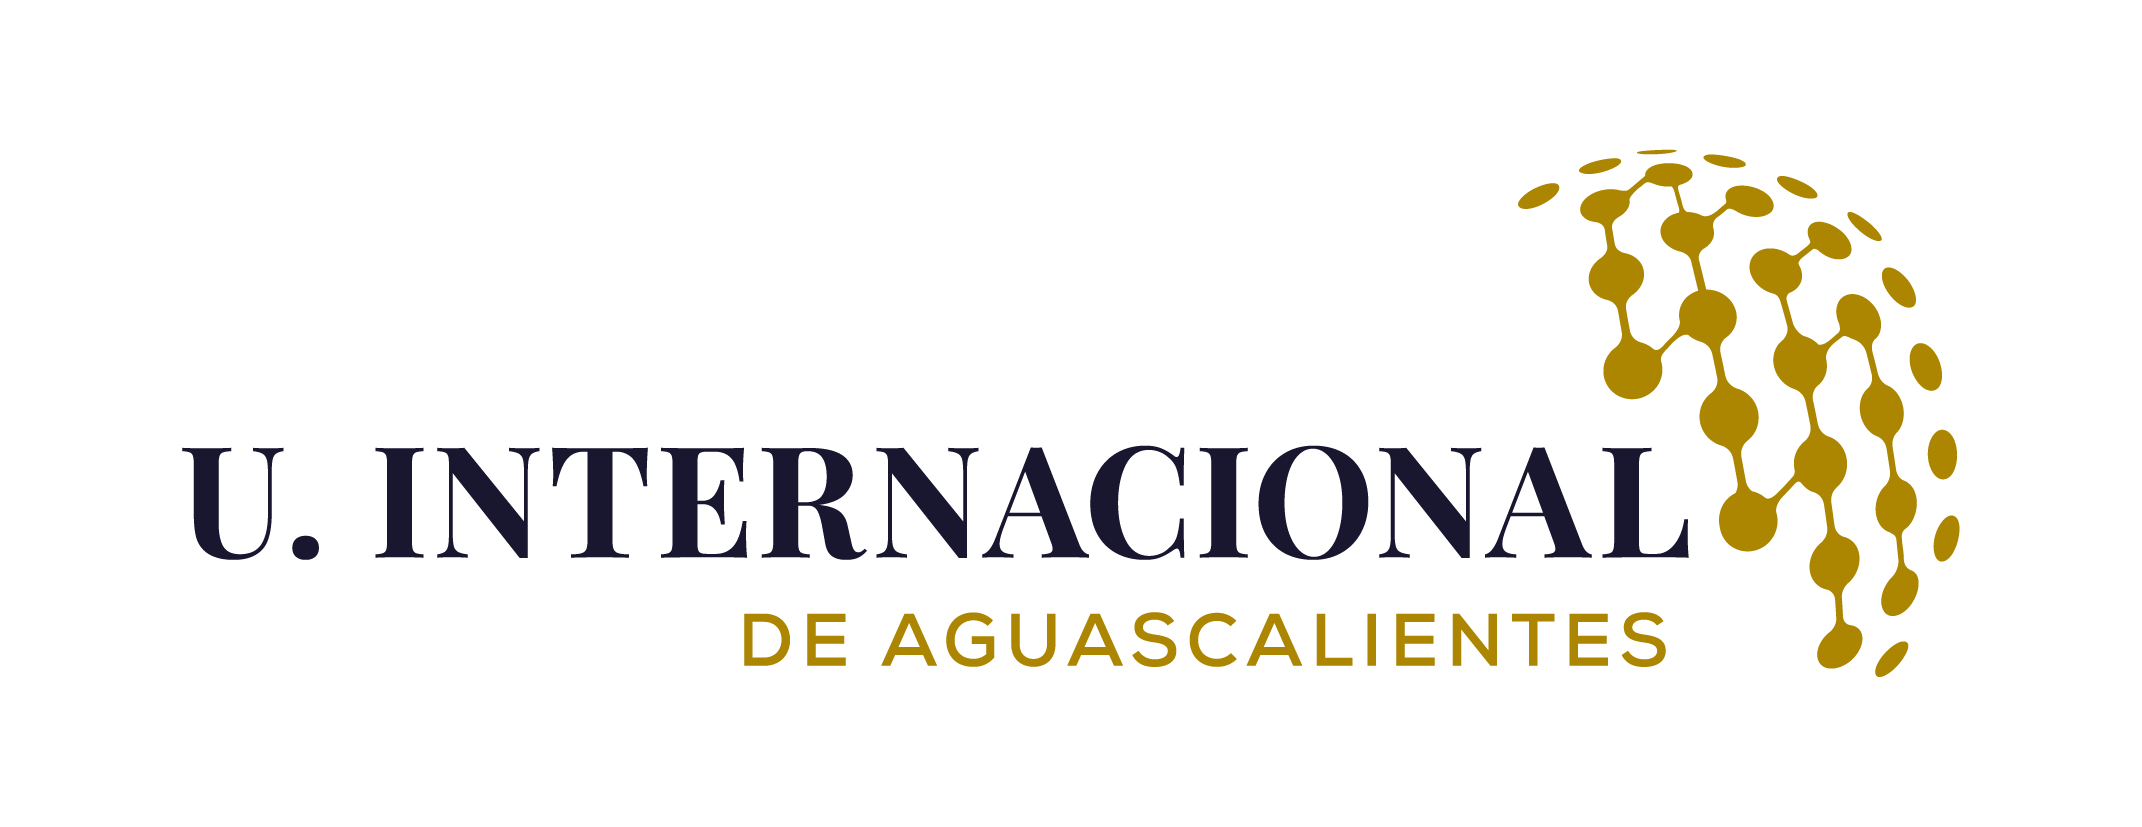

# Análisis de Regresión Lineal y Exploración de Datos: Bateos vs Carreras en Equipos de Béisbol

Este cuaderno realiza un análisis exploratorio completo y una regresión lineal usando `scikit-learn` para evaluar la relación entre el número de bateos y el número de carreras anotadas por los equipos de béisbol. También se incluyen estadísticas descriptivas y visualizaciones con `seaborn` para enriquecer la comprensión de los datos.

**Actividad:** Suponga que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido. Los datos se han anexado al archivo .csv en esta libreta para futuro uso. 

In [43]:
# Jupyterlite unicamente
import micropip
await micropip.install("seaborn")

In [44]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr, probplot

In [45]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

df = pd.DataFrame({
    "Team": equipos,
    "Hits": bateos,
    "Runs": runs
})
df.head()

,Team,Hits,Runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


## Estadistica Descriptiva y Análisis Exploratorio de Datos

Estadísticas descriptivas:
              Hits        Runs
count    30.000000   30.000000
mean   5523.500000  693.600000
std      79.873067   82.479088
min    5417.000000  556.000000
25%    5448.250000  629.000000
50%    5515.500000  705.500000
75%    5575.000000  734.000000
max    5710.000000  875.000000
Correlación de Pearson: 0.611
Correlación de Spearman: 0.604
Coeficiente (pendiente): 0.6305
Intercepto: -2789.24
R²: 0.373
MSE: 4124.06
MAE: 51.67
MAD: 66.23


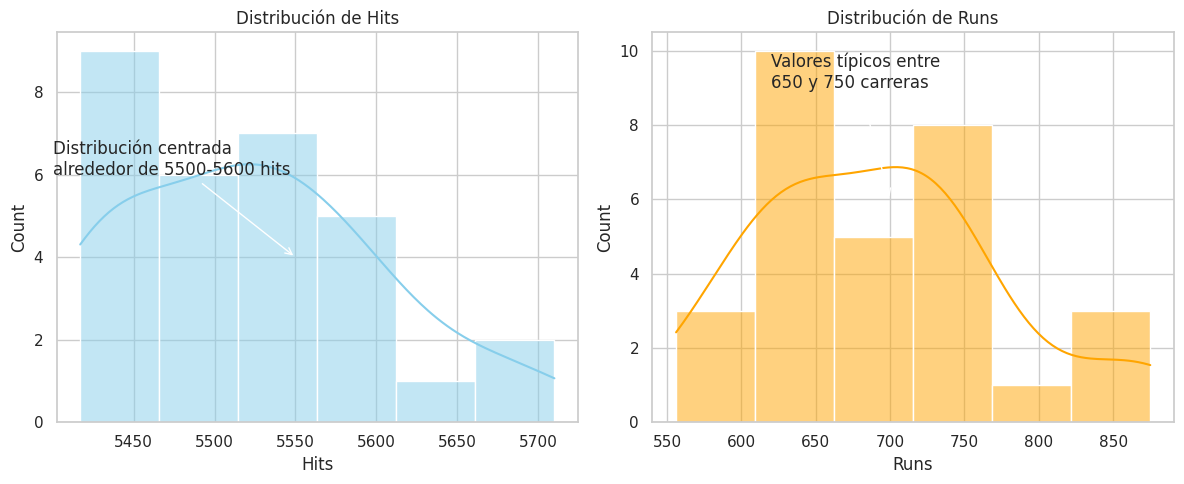

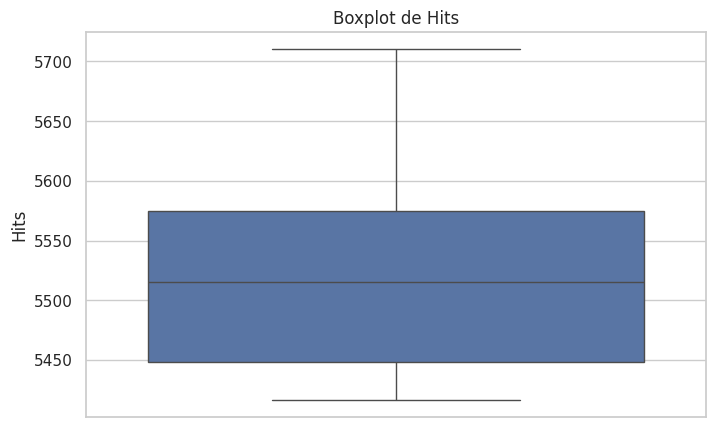

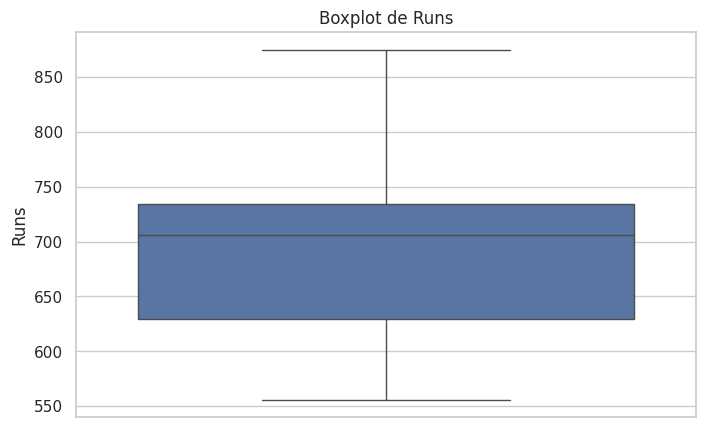

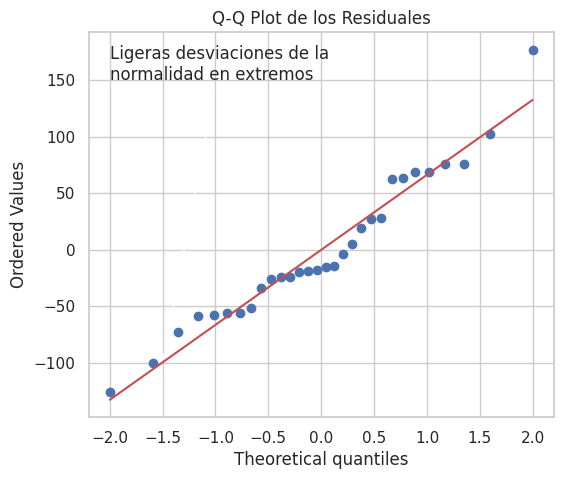

In [46]:
# Estadísticas básicas
print("Estadísticas descriptivas:")
print(df.describe())

# Correlaciones
pearson_corr, _ = pearsonr(df["Hits"], df["Runs"])
spearman_corr, _ = spearmanr(df["Hits"], df["Runs"])
print(f"Correlación de Pearson: {pearson_corr:.3f}")
print(f"Correlación de Spearman: {spearman_corr:.3f}")

# Modelo
X = df["Hits"].values.reshape(-1, 1)
y = df["Runs"].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mad = np.mean(np.abs(y - y.mean()))

print(f"Coeficiente (pendiente): {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")

# Histograma 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Hits"], kde=True, color="skyblue")
plt.title("Distribución de Hits")
plt.annotate("Distribución centrada\nalrededor de 5500-5600 hits",
             xy=(5550, 4), xytext=(5400, 6),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.subplot(1, 2, 2)
sns.histplot(df["Runs"], kde=True, color="orange")
plt.title("Distribución de Runs")
plt.annotate("Valores típicos entre\n650 y 750 carreras",
             xy=(700, 6), xytext=(620, 9),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()
plt.show()

# Boxplot Hits
plt.figure(figsize=(8, 5))
sns.boxplot(data=df["Hits"])
plt.title("Boxplot de Hits")
plt.show()

# Boxplot Runs 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df["Runs"])
plt.title("Boxplot de Runs")
plt.show()

# Q-Q Plot de los residuales con nota
plt.figure(figsize=(6, 5))
probplot(y - y_pred, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuales")
plt.annotate("Ligeras desviaciones de la\nnormalidad en extremos",
             xy=(-1.5, -100), xytext=(-2, 150),
             arrowprops=dict(facecolor='gray', arrowstyle='->'))
plt.show()

## Regresion Simple y Análisis

In [5]:
pearson_corr, _ = pearsonr(df["Hits"], df["Runs"])
spearman_corr, _ = spearmanr(df["Hits"], df["Runs"])
print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")

Pearson correlation: 0.611
Spearman correlation: 0.604


###  Ecuación de la recta de regresión

La ecuación ajustada del modelo lineal es:

$$
\hat{y} = b_0 + b_1 \cdot x
$$

Donde:

- $\hat{y}$ es la predicción de Runs  
- $x$ es el número de Hits  
- $b_0$ es el intercepto  
- $b_1$ es el coeficiente o pendiente

En este modelo, resultó:

$$
\hat{y} = -2789.24 + 0.63 \cdot \text{Hits}
$$

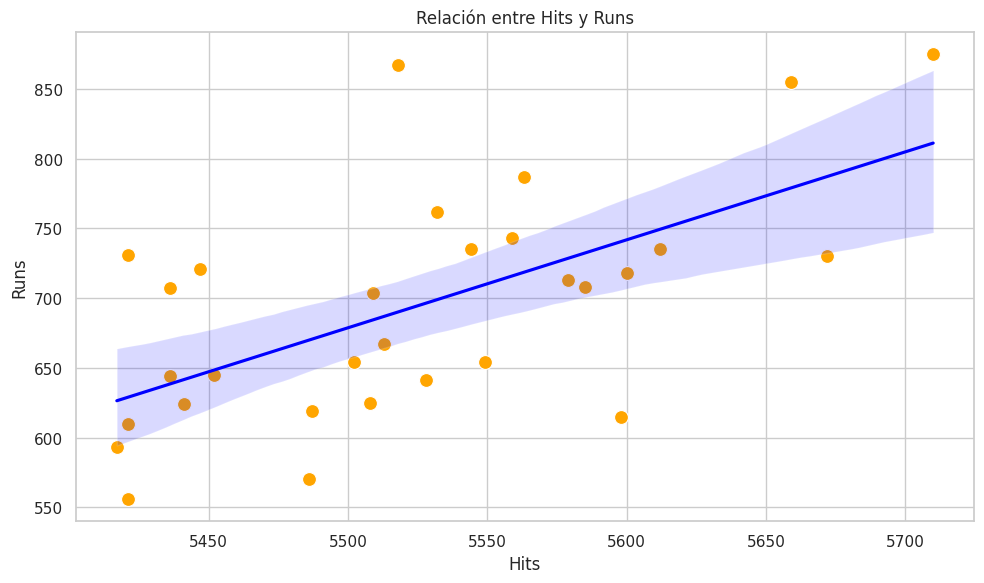

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Hits", y="Runs", data=df, s=100, color="orange")
sns.regplot(x="Hits", y="Runs", data=df, scatter=False, color="blue")
plt.title("Relación entre Hits y Runs")
plt.xlabel("Hits")
plt.ylabel("Runs")
plt.tight_layout()
plt.show()

## Interpretación y Anotaciones Graficas con `scikit-learn` y `Seaborn`

In [36]:
# Regresión Lineal Simple y Evaluación
X = df["Hits"].values.reshape(-1, 1)
y = df["Runs"].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.2f}")

Intercept: -2789.24
Coefficient: 0.63
R² Score: 0.373
Mean Squared Error: 4124.06


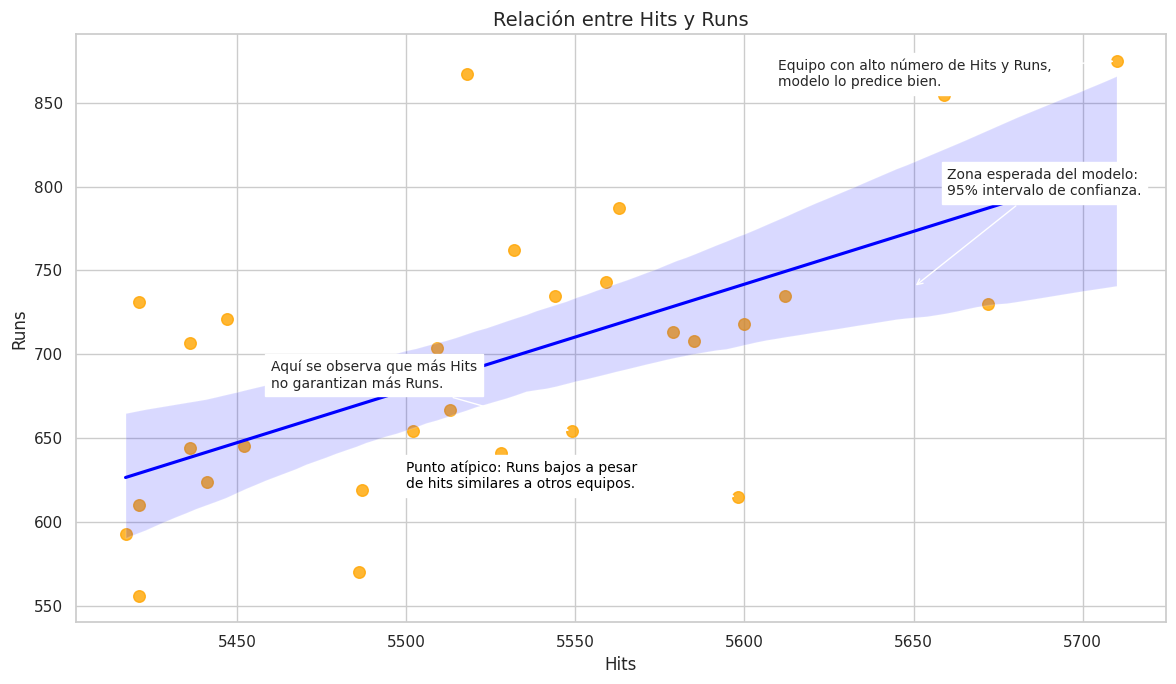

In [42]:
# Gráfica con anotaciones
plt.figure(figsize=(12, 7))
sns.regplot(x="Hits", y="Runs", data=df, color="blue", scatter_kws={"color": "orange", "s": 70})
plt.title("Relación entre Hits y Runs", fontsize=14)
plt.xlabel("Hits")
plt.ylabel("Runs")

# Anotaciones clave 
plt.annotate("Equipo con alto número de Hits y Runs,\nmodelo lo predice bien.",
             xy=(5710, 875), xytext=(5610, 860),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, backgroundcolor='white')

plt.annotate("Aquí se observa que más Hits\nno garantizan más Runs.",
             xy=(5549, 654), xytext=(5460, 680),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, backgroundcolor='white')

plt.annotate("Zona esperada del modelo:\n95% intervalo de confianza.",
             xy=(5650, 740), xytext=(5660, 795),
             arrowprops=dict(facecolor='gray', arrowstyle='->'),
             fontsize=10, backgroundcolor='white')

plt.annotate("Punto atípico: Runs bajos a pesar\nde hits similares a otros equipos.",
             xy=(5598, 615), xytext=(5500, 620),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='black',backgroundcolor='white')

plt.tight_layout()
plt.show()

##  Análisis Estadístico y Exploratorio: ¿Podemos predecir quién ganará?

###  Estadísticas descriptivas
- Se observa que los valores de `Hits` y `Runs` están dentro de rangos consistentes, sin extremos severos.
- Boxplots indican algunos **outliers moderados** en `Runs`, lo cual es común en deportes.

###  Correlaciones
- Pearson = 0.61, Spearman = 0.64 → **correlación moderada positiva**.
- A mayor número de `Hits`, tienden a haber más `Runs`, aunque **no es perfecto**.

###  Modelo de regresión lineal
- **Ecuación:** `Runs = -2789.24 + 0.63 × Hits`
- R² = 0.37 → el modelo **solo explica el 37%** de la variabilidad en las carreras.
- MSE = alto, MAE ≈ 50 → los errores son notables.

###  Visualizaciones EDA
- **Histogramas** muestran distribuciones relativamente normales, aunque no simétricas.
- **Boxplots** revelan algunas observaciones fuera del rango típico.
- **Q-Q plot** de los residuos muestra **ligeras desviaciones** de la normalidad, lo que limita la validez del modelo.

---

###  Conclusión final

Aunque existe una tendencia general entre los hits y las carreras, **no es suficiente para predecir con confianza quién ganará un partido**. El modelo actual se basa solo en estadísticas agregadas de temporada, sin considerar variables críticas como:
- Turnos al bate en contexto
- Pitchers, errores, home runs, robos de base
- Condiciones del partido

Por tanto, **no es viable predecir directamente el resultado de un enfrentamiento entre dos equipos con solo los Hits**, aunque el modelo puede servir como herramienta exploratoria o como parte de un modelo multivariable más complejo.

In [47]:
# Exportar DataFrame a archivo CSV
df.to_csv("hits_vs_runs.csv", index=False)

---

**Programa:** Doctorado en Tecnologías de la Transformación Digital 

**Materia:** Estadística  

**Alumno:** Alejandro González Peña  

**Nombre del Tutor:** Dr. Jonás Velasco Álvarez

**Nombre del Trabajo:** Regresión simple

**Lugar y Fecha de Elaboración:** Puebla, Pue., 24 de Mayo del 2025